In [1]:
%matplotlib inline

from npnet import *
from utils import *

# Natural Parameter Networks: a Class of Probabilistic Natural Networks
## A paper by H. Wang, X. Shi and D.Y. Yeung [1]

# Motivation and goals

Learning framework that accomplishes:


- Explicit management of uncertainty

- Probabilistic Graphical Models flexibility to fit distributions, but without sampling

- Same scalability as neural networks
    - Trainable via backpropagation

- Rich selection of distributions to choose for fitting the data: exponential family

# What are NPNs?

| Standard Neural Net | Natural Parameter Net. Source: [2] |
|:-----:|:-----:|
| <img src="img/standard_nn.png" width="400px"> | <img src="img/npn_example.png" width="400px"> |

In standard neural nets:
- Weights, biases and neuron values are real quantities

In NPN:
- Weights, biases and neuron values are random variables that follow a distribution from the exponential family

# Exponential family

Exponential family distributions have the form:

$$ p(x | \boldsymbol{\eta}) = h(x) g(\boldsymbol{\eta}) exp(\boldsymbol{\eta}^T \mathbf{u}(x)) $$

Where $ \mathbf{\eta} $ consists of the natural parameters of the distribution. Examples of available distributions:

- Gaussian distribution

- Gamma distribution

- Beta distribution

- Poisson distribution

- Exponential distribution

# Particularities of NPN


- Two times more parameters than in a NN with the same architecture.

- Feedforward and non-linear transforms are somewhat more complex. Resulting distributions are approximated by fitting a new exponential family distribution using the 1st and 2nd order moments.

- It is possible to come up with a set of equations for backpropagation. Gradient-based methods for training are applicable

- As for the error or loss function, one possibility is to apply Kullback-Leibler Divergence between the target distribution and the fitted distribution:

$$ D_{KL}(P\ ||\ Q) = \int_\mathbb{R} p(x) \log\left(\frac{p(x)}{q(x)}\right) \mathrm{d}x $$

One can calculate the close form of the KL loss for known distributions of the exponential family. E.g.: for Gaussians it can be proven that:

$$ D_{KL}(\mathcal{N}(\mu_1, \sigma_1^2), \mathcal{N}(\mu_2, \sigma_2^2)) = \frac{1}{2}\left[ \frac{(\mu_2 - \mu_1)^2}{\sigma_2^2} + \frac{\sigma_1^2}{\sigma_2^2} - 1 - \log\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right] $$

# Example: regression task

We provide an experimental implementation of the proposed method, using Gaussian distributions and sigmoid activation functions.


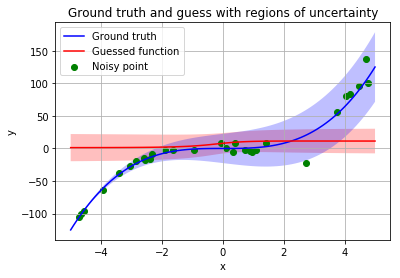

In [9]:
# toy regression task
np.random.seed(42)
npn = NPNet([1, 100, 1], ['sigmoid', 'linear'], 'gaussian', std0=1.0)
np.random.seed(73)
f = lambda x: np.power(x, 3)
g = lambda x: np.power(x+5.0, 1.25)
x, y = sample_function(-5, 5, 30, f, g)
# show without training (NPN with random weights and biases)
plt.show(plot_truth_and_guess(f, g, x, y, npn))

100 iterations of GD


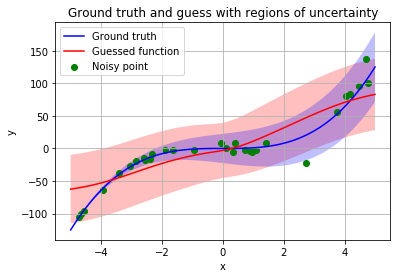

In [10]:
npn.train(x, y, eta=1e-1, max_iterations=100, sigma=0.0)
print("100 iterations of GD")
plt.show(plot_truth_and_guess(f, g, x, y, npn))

500 iterations of GD


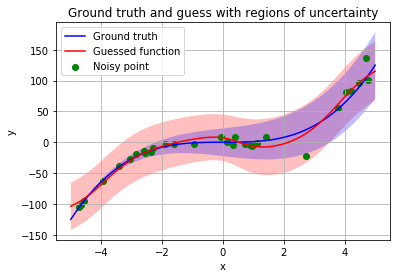

In [11]:
print("500 iterations of GD")
npn.train(x, y, eta=1e-1, max_iterations=400, sigma=0.0)
plt.show(plot_truth_and_guess(f, g, x, y, npn))

1000 iterations of GD


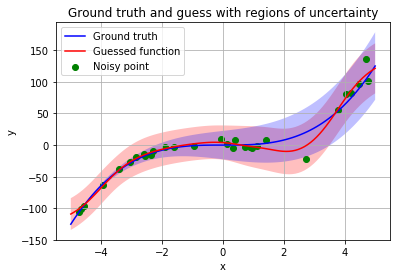

In [12]:
print("1000 iterations of GD")
npn.train(x, y, eta=1e-1, max_iterations=500, sigma=0.0)
plt.show(plot_truth_and_guess(f, g, x, y, npn))

# Example: regularization

It is possible to train with regularization, imposing priors $ \mathcal{N}(0, \lambda_s^{-1}) $ to the weights. Previous result:

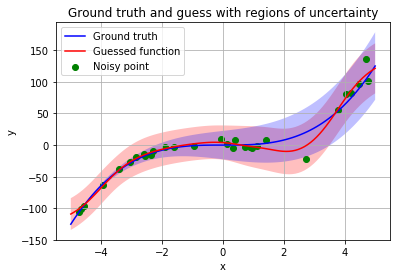

In [13]:
plt.show(plot_truth_and_guess(f, g, x, y, npn))

In [15]:
%reset -f
from npnet import *
from utils import *

Result with regularization:

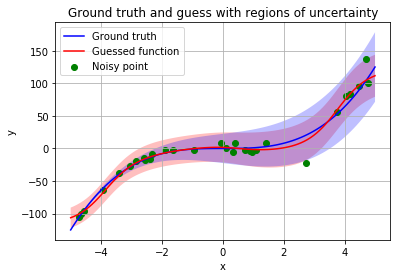

In [16]:
np.random.seed(42)
npn = NPNet([1, 100, 1], ['sigmoid', 'linear'], 'gaussian', std0=1.0)
np.random.seed(73)
f = lambda x: np.power(x, 3)
g = lambda x: np.power(x+5.0, 1.25)
x, y = sample_function(-5, 5, 30, f, g)
npn.train(x, y, eta=1e-1, max_iterations=1000, sigma=0.0, lambda_s=1e-3) # Added lambda_s parameter
plt.show(plot_truth_and_guess(f, g, x, y, npn))

# Results: MNIST

Tested against MNIST dataset. Results extracted from the work of Wang and others [1, 3]:


|Method|BDK|BBB|Dropout1|Dropout2|gamma NPN|Gaussian NPN|
|------:|---:|---:|--------:|--------:|---------:|------------:|
|**Error**|1.38%|1.34%|1.33%|1.40%|1.27%|1.25%|

|        |   |   |    |     |
|--------|---|---|----|-----|
|**Size**|100|500|2000|10000|
|**NPN**|29.97%|13.79%|7.89%|3.28%|
|**Dropout**|32.58%|15.39%|8.78%|3.53%|
|**BDK**|30.08%|14.34%|8.31%|3.55%|

# Results: variance

The output variance is an effective proxy to assess the certainty that the network has on its own predictions:

| Output variance vs accuracy (MNIST). Source: [3] | Output variance vs Reconstruction Error (Second-Order Representation Learning) Source: [3] |
|:-----:|:-----:|
| <img src="img/mnist_var_acc.png" width="80%"> | <img src="img/repr_var_acc.png" width="80%"> |

# Conclusions

- The paper and the supplementary material give enough details to implement NPN. No implementation by the authors is available yet.

- The results in terms of accuracy (classification), RMS (regression) and reconstruction error (second order learning) are competitive with those in the recent literature.

- Output variance gives a good idea about how accurate is the network's prediction

# References

[1] Wang, H., Shi, X., & Yeung, D.-Y. (2016). Natural-Parameter Networks: A Class of Probabilistic Neural Networks, (1), 1–9. Retrieved from http://arxiv.org/abs/1611.00448

[2] Wang, H., Natural Parameter Networks: a Class of Probabilistic Neural Networks - NIPS 2016 spotlight video, https://www.youtube.com/watch?v=evfU0uEXPC8

[3] Wang, H., Shi, X., & Yeung, D. (2016). Supplementary Materials for Natural-Parameter Networks: A Class of Probabilistic Neural Networks.